# Proyek Analisis Data: Analysis Sepedah
- Nama: Aegner Billik
- Email: barakgasak48@gmail.com
- username : m491b4ky0145

## Menentukan Pertanyaan Bisnis
- Apa hubungan antara suhu dan jumlah peminjaman sepeda? Apakah suhu berkontribusi signifikan terhadap jumlah peminjaman?
- Apakah pola penggunaan sepeda berbeda antara hari kerja dan hari libur?
- Bagaimana perbedaan peminjaman sepeda antara tahun 2011 dan 2012? Apakah ada tren tertentu?
- Bagaimana musim memengaruhi penggunaan sepeda? Musim apa yang paling populer?


## Menyiapkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
rental_daily_df = pd.read_csv("data/day.csv")
rental_daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
rental_hourly_df = pd.read_csv("data/hour.csv")
rental_hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

Mencari tahu info dari data yang digunakan

In [7]:
print(rental_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [8]:
print(rental_hourly_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


checking data null pada data frame

In [9]:
print(rental_daily_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print(rental_hourly_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


cek duplikat data

In [11]:
print('Baris duplikat pada rental_daily_df:', rental_daily_df.duplicated().sum())
print('Baris duplikat pada rental_hourly_df:', rental_hourly_df.duplicated().sum())

Baris duplikat pada rental_daily_df: 0
Baris duplikat pada rental_hourly_df: 0


### Cleaning Data

Mengubah data pada kolom season dari nomor menjadi sebuah nama musim

In [12]:
# Mengubah kolom season dari angka ke nama musim
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
rental_daily_df['season'] = rental_daily_df['season'].map(season_mapping)
rental_hourly_df['season'] = rental_hourly_df['season'].map(season_mapping)

In [13]:
print(rental_daily_df['season'].value_counts())

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64


In [14]:
print(rental_hourly_df['season'].value_counts())

season
fall      4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64


In [15]:
# Mengubah kolom weather menjadi deskripsi kondisi cuaca
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'}
rental_daily_df['weathersit'] = rental_daily_df['weathersit'].map(weather_mapping)
rental_hourly_df['weathersit'] = rental_hourly_df['weathersit'].map(weather_mapping)

In [16]:
print(rental_daily_df['weathersit'].value_counts())

weathersit
clear         463
mist          247
light rain     21
Name: count, dtype: int64


In [17]:
print(rental_hourly_df['weathersit'].value_counts())

weathersit
clear         11413
mist           4544
light rain     1419
heavy rain        3
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

### Explore Rental Daily

Normalisasi kolom temp

In [18]:
# Normalisasi kolom suhu ke skala Celsius
t_max, t_min = 39, -8
rental_daily_df['temp_celsius'] = rental_daily_df['temp'] * (t_max - t_min) + t_min

In [19]:
print(rental_daily_df.groupby('weathersit').cnt.count())

weathersit
clear         463
light rain     21
mist          247
Name: cnt, dtype: int64


In [20]:
print(rental_hourly_df.describe(include='all'))

           instant      dteday season            yr          mnth  \
count   17379.0000       17379  17379  17379.000000  17379.000000   
unique         NaN         731      4           NaN           NaN   
top            NaN  2011-01-01   fall           NaN           NaN   
freq           NaN          24   4496           NaN           NaN   
mean     8690.0000         NaN    NaN      0.502561      6.537775   
std      5017.0295         NaN    NaN      0.500008      3.438776   
min         1.0000         NaN    NaN      0.000000      1.000000   
25%      4345.5000         NaN    NaN      0.000000      4.000000   
50%      8690.0000         NaN    NaN      1.000000      7.000000   
75%     13034.5000         NaN    NaN      1.000000     10.000000   
max     17379.0000         NaN    NaN      1.000000     12.000000   

                  hr       holiday       weekday    workingday weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000      17379   
unique           

### Explore rental hourly

normalisasi kolom temp

In [21]:
# Normalisasi kolom suhu
rental_hourly_df['temp_celsius'] = rental_hourly_df['temp'] * (t_max - t_min) + t_min

In [22]:
print(rental_hourly_df.groupby('weathersit').cnt.count())

weathersit
clear         11413
heavy rain        3
light rain     1419
mist           4544
Name: cnt, dtype: int64


In [23]:
print(rental_hourly_df.describe(include='all'))

           instant      dteday season            yr          mnth  \
count   17379.0000       17379  17379  17379.000000  17379.000000   
unique         NaN         731      4           NaN           NaN   
top            NaN  2011-01-01   fall           NaN           NaN   
freq           NaN          24   4496           NaN           NaN   
mean     8690.0000         NaN    NaN      0.502561      6.537775   
std      5017.0295         NaN    NaN      0.500008      3.438776   
min         1.0000         NaN    NaN      0.000000      1.000000   
25%      4345.5000         NaN    NaN      0.000000      4.000000   
50%      8690.0000         NaN    NaN      1.000000      7.000000   
75%     13034.5000         NaN    NaN      1.000000     10.000000   
max     17379.0000         NaN    NaN      1.000000     12.000000   

                  hr       holiday       weekday    workingday weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000      17379   
unique           

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan antara suhu dan jumlah peminjaman sepeda? Apakah suhu berkontribusi signifikan terhadap jumlah peminjaman?

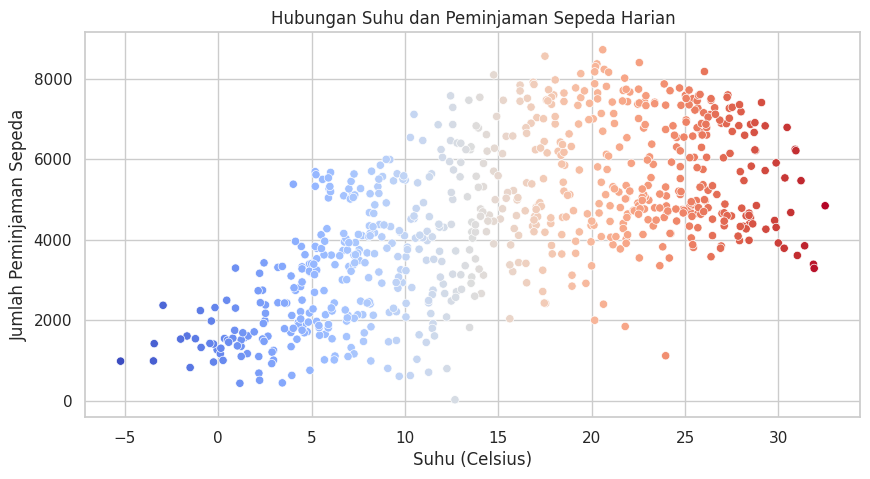

In [24]:
# visualize data
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.scatterplot(x='temp_celsius', y='cnt', data=rental_daily_df, hue='temp_celsius', palette='coolwarm', legend=False)

plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Hubungan Suhu dan Peminjaman Sepeda Harian')
plt.show()

Berdasarkan grafik scatter plot, tampak bahwa terdapat hubungan positif yang kuat antara suhu udara dengan jumlah peminjaman sepeda. Semakin tinggi suhu, semakin besar jumlah sepeda yang dipinjam. Hubungan ini terlihat dari pola linear pada data.


### Pertanyaan 2: Apakah pola penggunaan sepeda berbeda antara hari kerja dan hari libur?

In [25]:
sum_rental_daily_df = rental_daily_df.groupby('workingday')['cnt'].sum().reset_index()
sum_rental_daily_df['workingday'] = sum_rental_daily_df['workingday'].map({0: 'Hari Libur', 1: 'Hari Kerja'})

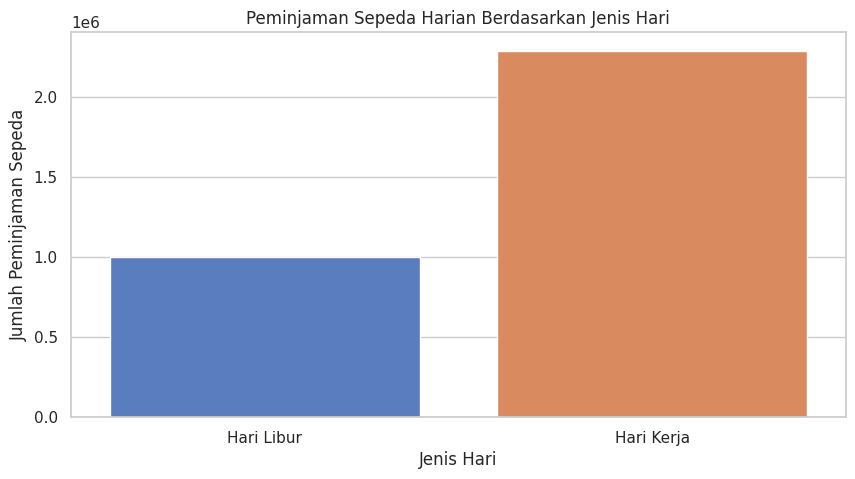

In [26]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x='workingday', y='cnt', data=sum_rental_daily_df, hue='workingday', dodge=False, palette='muted')

plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda Harian Berdasarkan Jenis Hari')
plt.show()


> Berdasarkan bar plot diatas, terlihat jelas bahwa jumlah total peminjaman sepeda pada hari kerja dengan hari non-kerja dimana jumah peminjaman pada hari kerja 2 kali lipat lebih banyak dibandingkan hari non-kerja.

### Pertanyaan 3 : Bagaimana perbedaan peminjaman sepeda antara tahun 2011 dan 2012? Apakah ada tren tertentu?

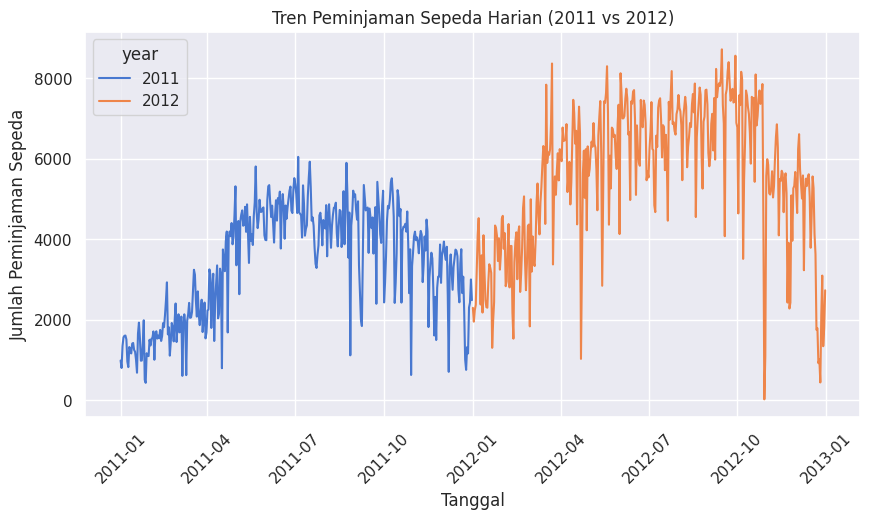

In [27]:
rental_daily_df.rename(columns={'yr': 'year'}, inplace=True)
rental_daily_df['year'] = rental_daily_df['year'].map({0: 2011, 1: 2012})
rental_daily_df['dteday'] = pd.to_datetime(rental_daily_df['dteday'])

plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
sns.lineplot(x='dteday', y='cnt', data=rental_daily_df, hue='year', palette='muted')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda Harian (2011 vs 2012)')
plt.xticks(rotation=45)
plt.show()

>Grafik menunjukkan bahwa jumlah peminjaman sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011.

### Pertanyaan 4 : Bagaimana musim memengaruhi penggunaan sepeda? Musim apa yang paling populer?

In [28]:
sum_season_rental_daily_df = rental_daily_df.groupby('season')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
most_popular_season = sum_season_rental_daily_df.iloc[0]['season']


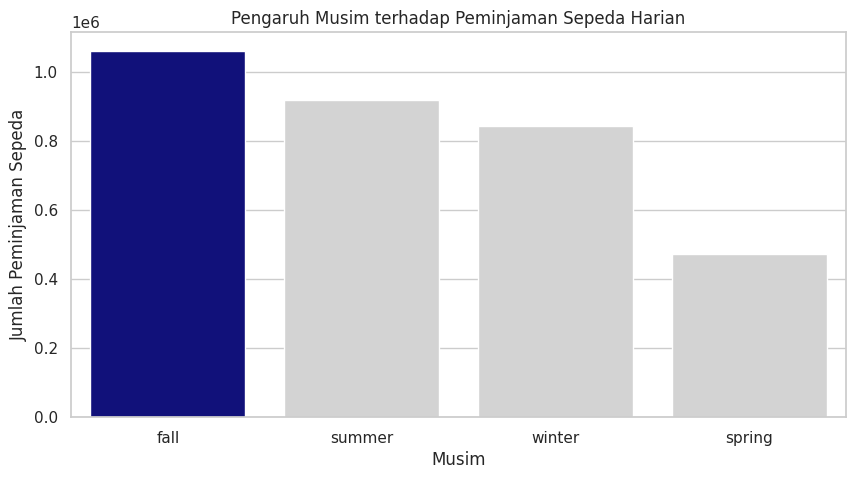

In [29]:
#visualisasi data
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x='season', y='cnt', data=sum_season_rental_daily_df, hue='season', palette=['DARKBLUE' if (x == most_popular_season) else '#D3D3D3' for x in sum_season_rental_daily_df['season']], order=sum_season_rental_daily_df['season'])

plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Pengaruh Musim terhadap Peminjaman Sepeda Harian')
plt.show()

> musim gugur menjadi musim tertinggi jumlah peminjaman sepeda

## Conclusion

>#### Apa hubungan antara suhu dan jumlah peminjaman sepeda? Apakah suhu berkontribusi signifikan terhadap jumlah peminjaman?
>>- Hubungan positif terlihat dari visualisasi yang menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda yang terjadi.
>
>#### Apakah pola penggunaan sepeda berbeda antara hari kerja dan hari libur?
>>- Hari kerja menunjukkan tingkat peminjaman sepeda yang lebih tinggi, mencerminkan penggunaan untuk aktivitas rutin.
>
>#### Bagaimana perbedaan peminjaman sepeda antara tahun 2011 dan 2012? Apakah ada tren tertentu?
>>- Tahun 2012 menunjukkan peningkatan peminjaman sepeda dibandingkan tahun sebelumnya.
>
>#### Bagaimana musim memengaruhi penggunaan sepeda? Musim apa yang paling populer?
>>- Musim gugur memiliki jumlah peminjaman tertinggi, menunjukkan kenyamanan suhu yang sesuai untuk bersepeda.
